### **Lab 2: Introduction to Complex Exponentials**

The goal of this laboratory is to gain familiarity with complex numbers and their use in representing sinusoidal signals as complex exponentials.

**Complex Numbers in Python**


Python can be used to compute complex-valued formulas and also to display the results as a vector or “phasor” diagrams.

Here are some of numpy package complex number functions (remember to import package):

*conj ()*       Complex conjugate

*abs ()*        Magnitude

*angle ()*      Angle (or phase) in radians

*real ()*       Real part

*imag ()*       Imaginary part
*j *        pre-defined as <math>&radic;-1</math>

*x = 3 + 4j*    j sufix defines imaginary constant

exp(1j<math>*</math>theta)  Function for the complex exponential

Each of these functions takes a vector (or matrix) as its input argument and operates on each element of the vector.

To display a complex number as a point in the complex plane you can directly use the provided function `plot_complex`. It can take a single number or a list of complex numbers as input. For instance, to display the complex number 2+1j:

In [45]:
!git clone https://github.com/pzinemanas/sis1lab.git
import numpy as np
from IPython.display import Audio

from util import load_audio, save_audio, plot_signals, plot_complex

fatal: destination path 'sis1lab' already exists and is not an empty directory.


In [ ]:
z = 2 + 1j
plot_complex(z)

And for displaying several complex numbers:

In [ ]:
z1 = 2 + 1j
z2 = 1j
z3 = -0.5j
plot_complex([z1, z2, z3], name=['z1', 'z2', 'z3'])

# **Exercises**

**1. Complex Numbers**

To exercise your understanding of complex numbers, do the following:

1.1. Define $z_1 = -1+j0.3$ and $z_2 = 0.8+j0.7$. Enter these in Python and plot them as points and vectors in the complex plane.

In [ ]:
z1 = -1 + 0.3j
z2 = 0.8 + 0.7j

plot_complex([z1, z2], name=['z1', 'z2'])

1.2. Compute the conjugate z* and the inverse 1/z for both $z_1$ and $z_2$ and plot the results as vectors in the complex plane.

In [ ]:
z1_conjugate = np.conj(z1)
z1_inverse = 1 / z1

z2_conjugate = np.conj(z2)
z2_inverse = 1 / z2

plot_complex([z1_conjugate, z1_inverse, z2_conjugate, z2_inverse], name=['z1_conjugate', 'z1_inverse', 'z2_conjugate', 'z2_inverse'])

**2. Complex Exponentials**

Now let's work with complex exponentials. In python is very easy to work with these type of signals:

In [ ]:
A = 1
f0 = 200
fs = 44100
phi = np.pi/2
t = np.arange(0, .1, 1.0/fs)
x = A * np.exp(1j*(2*f0*np.pi*t + phi))

Now we can plot the real and imaginary part of this signal:


In [ ]:
plot_signals([np.real(x), np.imag(x)], fs, name=['real part', 'imag part'])

2.1. Define a complex exponential with the same parameters that those from Lab 1 (Ex 3.1) and plot the real part.

In [ ]:
A = 0.1597
f0 = 196
fs = 44100
phi = 1.2*np.pi

# Time intervals
t_start = 0.2226308
t_end = t_start + 3 * (1 / f0)
t = np.arange(t_start, t_end, 1.0/fs)
x = A * np.exp(1j*(2*f0*np.pi*t + phi))

plot_signals([np.real(x)], fs, name=['real part'])

**3. Harmonic signals**

Now, we will work with harmonic signals. Until now, we have been working with simple sinusoids signals but most musical instruments sounds are harmonic. This means that they are formed by a sinusoid of the fundamental frequency plus sinusoids with frequencies multiples of it. For instance, we can define the following signal formed by the fundamental frequency plus the second and the third harmonic (note that each wave has a different phase).



In [ ]:
f0 = 120
fs = 44100
phi = np.pi/2
t = np.arange(0, .1, 1.0/fs)
x = 1.1*np.cos(2*np.pi*f0*t + np.pi/2) + 0.8*np.cos(2*np.pi*2*f0*t) + 0.2*np.cos(2*np.pi*3*f0*t)
plot_signals(x, fs)

3.1. Load your reference audio signal and plot some periods (5-10) where the amplitude is stable. For instance see Ex. 2.3 from Lab 1.

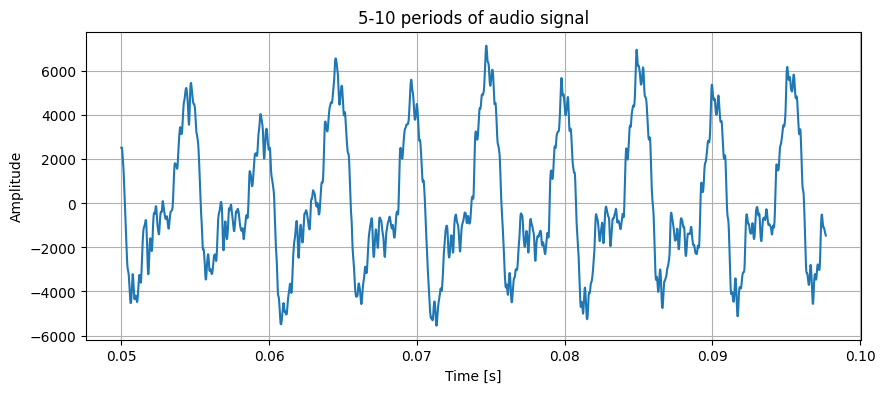

In [ ]:
from scipy.io import wavfile
import matplotlib.pyplot as plt

# Step 1: Load the audio signal (replace 'your_audio_file.wav' with your actual file path)
sampling_rate, signal_data = wavfile.read('ac_gtr_str3.wav')

# Convert to mono if stereo
if len(signal_data.shape) == 2:
    signal_data = signal_data.mean(axis=1)

# Step 2: Calculate the period and set t_start and t_end
frequency = 146.83  # Frequency of D3 in Hz
t_start = 0.05      # Start time after the attack section
num_periods = 7    # We need to plot three periods of the signal

# Calculate the period in seconds
period = 1 / frequency

# Calculate total duration for three periods
total_duration = num_periods * period

# Define t_end based on the calculated duration
t_end = t_start + total_duration

# Step 3: Define a time vector for plotting
# Extract the relevant portion of the signal (t_start to t_end)
start_sample = int(t_start * sampling_rate)
end_sample = int(t_end * sampling_rate)
signal_to_plot = signal_data[start_sample:end_sample]

# Create a time vector for the x-axis (time in seconds)
time_axis = np.linspace(t_start, t_end, len(signal_to_plot))

# Step 4: Plot the signal using Matplotlib (if plot_signals isn't available)
plt.figure(figsize=(10, 4))
plt.plot(time_axis, signal_to_plot)
plt.title("5-10 periods of audio signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

3.2. Now, define a harmonic signal, `y` whose fundamental frequency is the defined in Lab 1. Go step by step adding a new harmonic in each step. Plot both signals (the reference and the synthesized) and try to reproduce the shape of the reference signal.

**Note 1**: in order to have a similar shape, we need to select the amplitudes and phases carefully. One way to do this is to define the harmonic signal as follows:

$$y(t) = \sum_{k=1}^K A_k\cos\left(2\pi kf_0 t + k \phi - (k-1)\pi/2 \right), $$

where $K$ is the number of harmonics, $f_0$ is the fundamental frequency, $A_k$ is the amplitude (weight) of each harmonic and $\phi$ is the phase of the signal (defined in Lab1 Ex 2.4).

**Note 2**:
Define the $A_k$ values relative to the fundamental frequency. This means to define $A_1=1$ and the others less than 1. You can use Audacity to plot the spectrum of the fragment selected of the reference audio and measure the relative amplitudes of the harmonics.

**Note 3**: Normalize the amplitude of the signal by the same amplitude of the reference. For instance, if the amplitude of the reference signal is 0.33, you can normalize the syntesized signal by first dividing by its maximum and then multiplyng by 0.33:

```
y = 0.33 * y / np.amax(y)
```

In [49]:
# Fundamental frequency
f0 = 196 # Hz
A1 = 0.1597 # Initial amplitude
phi = 1.2*np.pi  # Phase
# Time intervals
t_start = 0
t_end = 12
t = np.arange(t_start, t_end, 1.0/fs)

Ak = [1, 0.8, 0.5, 0.25, 0.15, 0.1, 0.05]

y = Ak[0]

for k in range(1, len(Ak)):
  y += Ak[k] * np.cos(2 * np.pi * k * f0 * t + k * phi - (k-1) * np.pi / 2)

y = A1 * y / np.amax(y)

3.3. Listen to the synthtesis and remark what are the main differences between the reference and synthesis.

In [50]:
Audio(y, rate=fs)

Main differences:

The main difference is that  